# Feature selection

univariate selection

In [17]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [65]:
data = pd.read_csv("/home/local/BHRI/agarg/06/datasets/cdhit_features.csv")
X=data.iloc[:, 1:97]
y= data.iloc[:, -2]

# X=np.nan_to_num(X)
# y=np.nan_to_num(y)

for col in X.keys():
    X[col].fillna(0, inplace=True)

In [66]:
X.head()

,aindex,autocovariance,autocorrelation,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,...,column_NonPolar_number,column_NonPolar_percentage,column_Polar_number,column_Polar_percentage,column_Charged_number,column_Charged_percentage,column_Basic_number,column_Basic_percentage,column_Acidic_number,column_Acidic_percentage
0,27.03704,-0.092266,-0.117148,0.209259,-0.081667,0.237037,0.123704,0.253333,-0.030185,0.016111,...,28,51.852,26,48.148,14,25.926,10,18.519,4,7.407
1,170.00000,-0.040694,-0.021750,-0.486667,-0.689167,-0.384167,-0.004167,0.484167,0.006667,0.086667,...,8,66.667,4,33.333,4,33.333,4,33.333,0,0.000
2,127.69230,-0.029993,-0.023091,-0.150000,-0.251538,-0.234615,0.080769,-0.200769,0.293077,-0.050000,...,8,61.538,5,38.462,4,30.769,2,15.385,2,15.385
3,143.52940,-0.003134,-0.002698,-0.111765,-0.347059,-0.015882,0.174118,-0.205294,0.342353,0.235294,...,12,70.588,5,29.412,4,23.529,3,17.647,1,5.882
4,50.41237,-0.070462,-0.075575,0.278969,-0.232474,0.147113,0.186392,0.000825,0.084433,0.080825,...,52,53.608,45,46.392,20,20.619,12,12.371,8,8.247


In [67]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                   Features       Score
25                  hmoment  525.443474
92      column_Basic_number  512.485553
90    column_Charged_number  374.723243
42                       mw  354.080285
38                lengthpep  344.676786
86   column_NonPolar_number  344.194890
82  column_Aliphatic_number  321.864193
88      column_Polar_number  317.655109
78       column_tiny_number  279.185058
84   column_Aromatic_number  278.547014


Feature importance

96


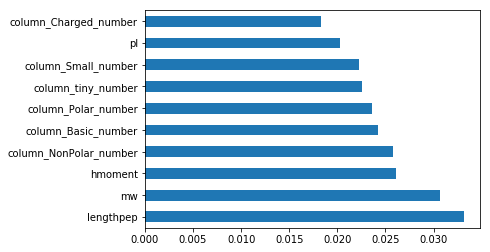

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators= 1000)
model.fit(X,y)
print(len(model.feature_importances_)) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

96


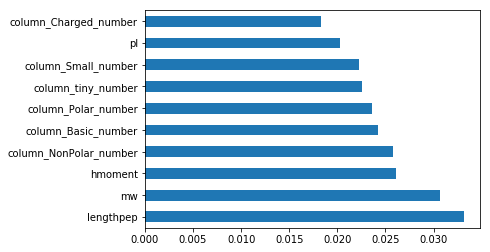

In [69]:
from sklearn.ensemble import RandomForestClassifier 
model1= RandomForestClassifier(n_estimators=1000, bootstrap= True, max_features= 'sqrt')
model1.fit(X, y)
print(len(model.feature_importances_)) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

correlation Matrix/ Heatmap

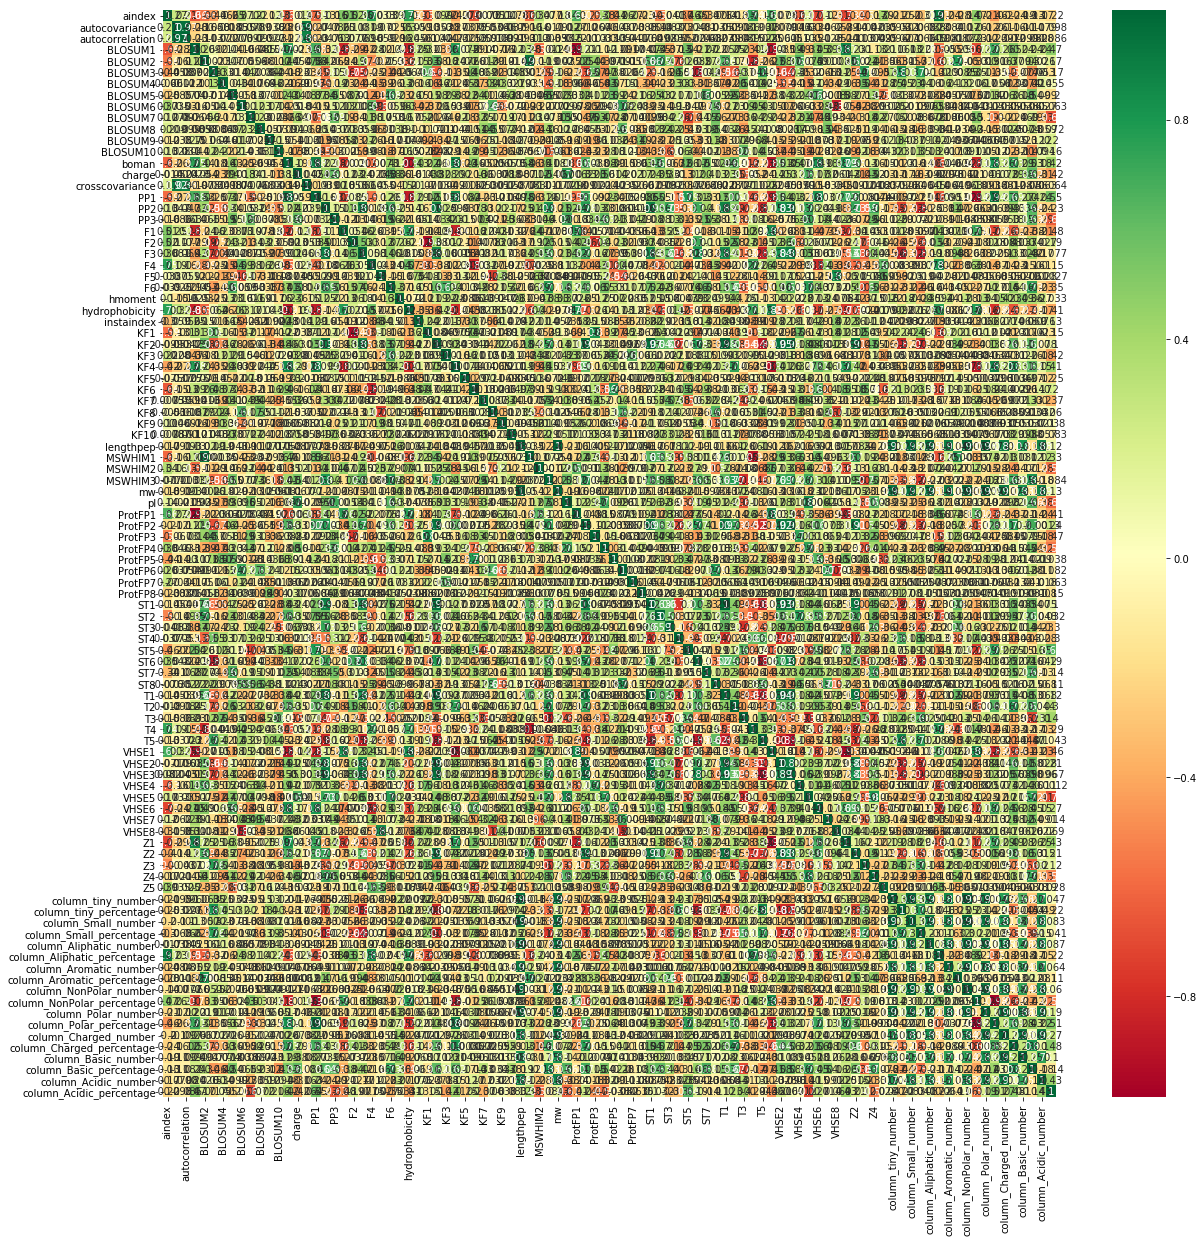

In [70]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [71]:
corrmat

,aindex,autocovariance,autocorrelation,BLOSUM1,BLOSUM2,BLOSUM3,BLOSUM4,BLOSUM5,BLOSUM6,BLOSUM7,...,column_NonPolar_number,column_NonPolar_percentage,column_Polar_number,column_Polar_percentage,column_Charged_number,column_Charged_percentage,column_Basic_number,column_Basic_percentage,column_Acidic_number,column_Acidic_percentage
aindex,1.000000,0.266587,0.213464,-0.661244,-0.560883,-0.443579,-0.065946,-0.254090,0.373636,0.121198,...,-0.140141,0.473812,-0.211443,-0.460023,-0.196784,-0.244776,-0.193343,-0.127035,-0.172755,-0.218889
autocovariance,0.266587,1.000000,0.968586,-0.282866,-0.156242,-0.058028,-0.001093,-0.085175,0.034826,0.078200,...,-0.069504,0.256024,-0.116106,-0.256024,-0.101311,-0.157420,-0.107654,-0.110812,-0.079101,-0.098086
autocorrelation,0.213464,0.968586,1.000000,-0.230616,-0.105075,-0.037372,-0.021702,-0.076971,0.030153,0.092379,...,-0.072008,0.227087,-0.116673,-0.227087,-0.096813,-0.124388,-0.099143,-0.081878,-0.080112,-0.085891
BLOSUM1,-0.661244,-0.282866,-0.230616,1.000000,0.262796,0.091784,-0.102617,0.040382,-0.155416,-0.064419,...,0.066315,-0.704603,0.217862,0.711334,0.257876,0.498759,0.242057,0.240281,0.240092,0.473200
BLOSUM2,-0.560883,-0.156242,-0.105075,0.262796,1.000000,0.002316,-0.100367,0.070194,-0.050424,-0.056443,...,-0.049720,-0.330596,0.018839,0.309168,0.067147,0.369010,0.093568,0.303603,0.025515,0.165823
BLOSUM3,-0.443579,-0.058028,-0.037372,0.091784,0.002316,1.000000,0.327193,-0.013658,-0.039726,0.199076,...,0.249185,0.345182,0.110700,-0.347572,-0.019667,-0.508952,-0.077330,-0.458105,0.053014,-0.171061
BLOSUM4,-0.065946,-0.001093,-0.021702,-0.102617,-0.100367,0.327193,1.000000,-0.043237,0.136807,-0.169472,...,0.199811,0.060287,0.165677,-0.055762,0.072467,-0.334281,0.007399,-0.415354,0.140919,0.055286
BLOSUM5,-0.254090,-0.085175,-0.076971,0.040382,0.070194,-0.013658,-0.043237,1.000000,-0.057795,-0.131507,...,-0.075677,-0.324553,0.001408,0.323842,0.059976,0.362748,0.184213,0.543475,-0.099143,-0.195824
BLOSUM6,0.373636,0.034826,0.030153,-0.155416,-0.050424,-0.039726,0.136807,-0.057795,1.000000,0.103871,...,-0.006141,0.042704,-0.011546,-0.032799,-0.035173,-0.095386,-0.037684,-0.064669,-0.027091,-0.063089
BLOSUM7,0.121198,0.078200,0.092379,-0.064419,-0.056443,0.199076,-0.169472,-0.131507,0.103871,1.000000,...,-0.053053,0.500671,-0.187907,-0.497778,-0.199581,-0.241959,-0.068581,0.189741,-0.329702,-0.678143


In [72]:
top_corr_features

Index(['aindex', 'autocovariance', 'autocorrelation', 'BLOSUM1', 'BLOSUM2',
       'BLOSUM3', 'BLOSUM4', 'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8',
       'BLOSUM9', 'BLOSUM10', 'boman', 'charge', 'crosscovariance', 'PP1',
       'PP2', 'PP3', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'hmoment',
       'hydrophobicity', 'instaindex', 'KF1', 'KF2', 'KF3', 'KF4', 'KF5',
       'KF6', 'KF7', 'KF8', 'KF9', 'KF10', 'lengthpep', 'MSWHIM1', 'MSWHIM2',
       'MSWHIM3', 'mw', 'pI', 'ProtFP1', 'ProtFP2', 'ProtFP3', 'ProtFP4',
       'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'ST1', 'ST2', 'ST3', 'ST4',
       'ST5', 'ST6', 'ST7', 'ST8', 'T1', 'T2', 'T3', 'T4', 'T5', 'VHSE1',
       'VHSE2', 'VHSE3', 'VHSE4', 'VHSE5', 'VHSE6', 'VHSE7', 'VHSE8', 'Z1',
       'Z2', 'Z3', 'Z4', 'Z5', 'column_tiny_number', 'column_tiny_percentage',
       'column_Small_number', 'column_Small_percentage',
       'column_Aliphatic_number', 'column_Aliphatic_percentage',
       'column_Aromatic_number', 'column_Aromatic_pe

In [73]:
sorted=corrmat.values.argsort()
sorted

array([[73, 70,  3, ..., 26, 83,  0],
       [73,  3, 16, ..., 15,  2,  1],
       [73, 16,  3, ..., 15,  1,  2],
       ...,
       [62, 75, 81, ..., 91, 41, 93],
       [69, 43,  9, ..., 88, 90, 94],
       [69,  9, 18, ..., 16, 56, 95]])

In [74]:
c = data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

PP1                          column_tiny_number             0.000070
column_tiny_number           PP1                            0.000070
KF4                          F3                             0.000175
F3                           KF4                            0.000175
BLOSUM7                      column_Aromatic_percentage     0.000197
column_Aromatic_percentage   BLOSUM7                        0.000197
lengthpep                    ProtFP7                        0.000403
ProtFP7                      lengthpep                      0.000403
VHSE3                        autocovariance                 0.000435
autocovariance               VHSE3                          0.000435
ST8                          column_Small_number            0.000465
column_Small_number          ST8                            0.000465
ProtFP8                      F3                             0.000482
F3                           ProtFP8                        0.000482
VHSE5                        boman

In [75]:
so.iloc[-116:-96:2]


lengthpep                   column_Polar_number        0.979889
                            column_Small_number        0.981314
mw                          column_NonPolar_number     0.981538
column_NonPolar_percentage  column_Polar_percentage    0.983909
column_Small_number         column_NonPolar_number     0.985251
mw                          column_Polar_number        0.985651
column_Small_number         column_tiny_number         0.988271
lengthpep                   column_NonPolar_number     0.988788
T1                          ST1                        0.997905
mw                          lengthpep                  0.998205
dtype: float64